In [46]:
from qiskit import *

# Create a GATE

In [47]:
qr = QuantumRegister(2)

In [48]:
cr = ClassicalRegister(2)

In [49]:
circuit = QuantumCircuit(qr, cr)

In [50]:
%matplotlib inline

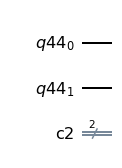

In [51]:
circuit.draw(output='mpl')

In [52]:
circuit.h(qr[0])

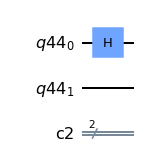

In [53]:
circuit.draw(output = 'mpl')

In [54]:
circuit.cx(qr[0], qr[1])

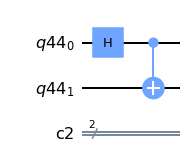

In [55]:
circuit.draw(output='mpl')

In [56]:
circuit.measure(qr, cr)

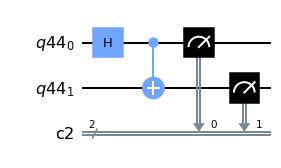

In [57]:
circuit.draw(output='mpl')

# local device

In [58]:
simulator = Aer.get_backend('qasm_simulator')

In [59]:
execute(circuit, backend=simulator)

In [60]:
result = execute(circuit, backend=simulator).result()

In [61]:
from qiskit.tools.visualization import plot_histogram

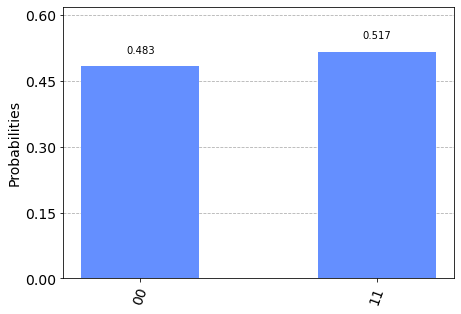

In [62]:
plot_histogram(result.get_counts(circuit))

# ibm system

In [63]:
from qiskit import IBMQ

In [64]:
MY_API_TOKEN = "b32678329f7f6dd426b8cf18f20bea23c2cd056b0bee2b4bcf49744b612e598f20f7170a8da4bfd99b009b6fa59d596edea7a6926fd388be158843d8e******"
IBMQ.save_account(MY_API_TOKEN, overwrite=True)

In [65]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-09-24 21:57:58,356: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [66]:
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')

In [67]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [68]:
backend = provider.get_backend('ibmq_santiago') 

In [69]:
job =execute(circuit, backend= backend)

In [70]:
from qiskit.tools.monitor import job_monitor

In [71]:
job_monitor(job)

Job Status: job has successfully run


In [72]:
result = job.result()

In [73]:
# plot_histogram

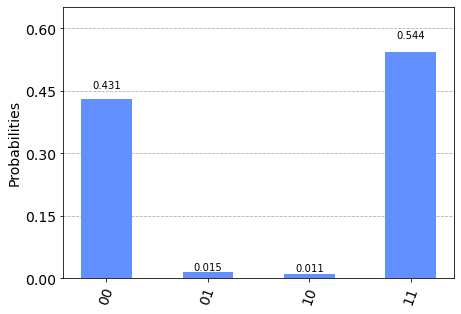

In [74]:
plot_histogram(result.get_counts(circuit))